<a href="https://colab.research.google.com/github/allen60725/pycookbook/blob/master/Auto_Risk_Clf_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Auto Risk Clf_XGBoost**

https://katerynad.github.io/Auto%20Insurance%20Risk%20Classification%20and%20Claim%20Prediction/Auto%20Insurance%20Risk%20Classification%20and%20Claim%20Prediction.htm

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df=pd.read_csv('/content/gdrive/My Drive/NextGenModeling/Bi_modeling_binned_base.csv')

In [0]:
df.head()

,polyr,ModelYr,bi_ecy,bi_wp,EstimatedAnnualDistance_v2,yrs_driving_exp,bi_SFX_CNT,SFX_CNT,bi_nc_inc_loss_dcce_t_100K,bi_nc_inc_loss_dcce_t,risk_zip_5,DrvPointsCharged_V2,Last_Owner_Average_Miles,Last_Owner_Recent_Annual_Mileage,Last_Owner_California_Recent_Ann,Modeled_Annual_Mileage,annual_mileage_v1,annual_mileage_v2,id,VehAge,ClaimInd,PolicyProgramCode_Affinity Group,PolicyProgramCode_Civil Servant,PolicyProgramCode_Educator,PolicyProgramCode_Firefighter,PolicyProgramCode_Law Enforcement,PolicyProgramCode_Non-Civil Servant,VehType_Antique,VehType_MotorHome,VehType_PrivatePassengerAuto,NewOrUsedInd_Missing,NewOrUsedInd_New,NewOrUsedInd_Used,gooddriverind_v2_Missing,gooddriverind_v2_N,gooddriverind_v2_Y,DrvMaritalStatus_v2_Married,DrvMaritalStatus_v2_Missing,DrvMaritalStatus_v2_Single,DrvGender_v2_Female,DrvGender_v2_Male,bi_split_limit_100/200,bi_split_limit_100/300,bi_split_limit_1000/1000,bi_split_limit_125/350,bi_split_limit_15/30,bi_split_limit_150/400,bi_split_limit_200/300,bi_split_limit_200/600,bi_split_limit_25/50,bi_split_limit_250/500,bi_split_limit_30/60,bi_split_limit_300/300,bi_split_limit_50/100,bi_split_limit_500/1000,bi_split_limit_500/500,VEHUSE_Business,VEHUSE_Farm,VEHUSE_Missing,VEHUSE_Pleasure,VEHUSE_Work,veh_op_matrix_10_2,veh_op_matrix_10_3,veh_op_matrix_10_4,veh_op_matrix_10_5,veh_op_matrix_10_6,veh_op_matrix_10_7,veh_op_matrix_11_3,veh_op_matrix_11_6,veh_op_matrix_12_4,veh_op_matrix_12_6,veh_op_matrix_1_1,veh_op_matrix_1_2,veh_op_matrix_1_3,veh_op_matrix_1_4,veh_op_matrix_2_1,veh_op_matrix_2_2,veh_op_matrix_2_3,veh_op_matrix_2_4,veh_op_matrix_3_1,veh_op_matrix_3_2,veh_op_matrix_3_3,veh_op_matrix_3_4,veh_op_matrix_3_5,veh_op_matrix_4_1,veh_op_matrix_4_2,veh_op_matrix_4_3,veh_op_matrix_4_4,veh_op_matrix_4_5,veh_op_matrix_5_1,veh_op_matrix_5_2,veh_op_matrix_5_3,veh_op_matrix_5_4,veh_op_matrix_5_5,veh_op_matrix_5_6,veh_op_matrix_6_1,veh_op_matrix_6_2,veh_op_matrix_6_3,veh_op_matrix_6_4,veh_op_matrix_6_5,veh_op_matrix_6_6,veh_op_matrix_6_7,veh_op_matrix_7_1,veh_op_matrix_7_2,veh_op_matrix_7_3,veh_op_matrix_7_4,veh_op_matrix_7_5,veh_op_matrix_7_6,veh_op_matrix_7_7,veh_op_matrix_8_1,veh_op_matrix_8_2,veh_op_matrix_8_3,veh_op_matrix_8_4,veh_op_matrix_8_5,veh_op_matrix_8_6,veh_op_matrix_8_7,veh_op_matrix_9_1,veh_op_matrix_9_2,veh_op_matrix_9_3,veh_op_matrix_9_4,veh_op_matrix_9_5,veh_op_matrix_9_6,veh_op_matrix_missing,DrvGender_v2 _Female,DrvGender_v2 _Male,DrvGender_v2 _Missing
0,2009,2003,0.5,137.450394,5000,53.845514,0.0,0.0,0.0,0.0,91406,0.0,6115.25914,4437.708368,6054.330072,11968.0418,5437.793048,5555.760793,0,6,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2009,2003,0.5,137.450394,6000,53.845514,0.0,0.0,0.0,0.0,91406,0.0,6115.25914,4437.708368,6054.330072,11968.0418,5437.793048,5555.760793,1,6,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2010,2003,0.5,137.450394,6000,53.845514,0.0,0.0,0.0,0.0,91406,0.0,6115.25914,4437.708368,6054.330072,11968.0418,5437.793048,5555.760793,2,7,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2010,2003,0.5,137.450394,6000,53.845514,0.0,0.0,0.0,0.0,91406,0.0,6115.25914,4437.708368,6054.330072,11968.0418,5437.793048,5555.760793,3,7,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2011,2003,0.5,137.450394,6000,53.845514,0.0,0.0,0.0,0.0,91406,0.0,6115.25914,4437.708368,6054.330072,11968.0418,5437.793048,5555.760793,4,8,0,0,

In [0]:
df.describe()

,polyr,ModelYr,bi_ecy,bi_wp,EstimatedAnnualDistance_v2,yrs_driving_exp,bi_SFX_CNT,SFX_CNT,bi_nc_inc_loss_dcce_t_100K,bi_nc_inc_loss_dcce_t,risk_zip_5,DrvPointsCharged_V2,Last_Owner_Average_Miles,Last_Owner_Recent_Annual_Mileage,Last_Owner_California_Recent_Ann,Modeled_Annual_Mileage,annual_mileage_v1,annual_mileage_v2,id,VehAge,ClaimInd,PolicyProgramCode_Affinity Group,PolicyProgramCode_Civil Servant,PolicyProgramCode_Educator,PolicyProgramCode_Firefighter,PolicyProgramCode_Law Enforcement,PolicyProgramCode_Non-Civil Servant,VehType_Antique,VehType_MotorHome,VehType_PrivatePassengerAuto,NewOrUsedInd_Missing,NewOrUsedInd_New,NewOrUsedInd_Used,gooddriverind_v2_Missing,gooddriverind_v2_N,gooddriverind_v2_Y,DrvMaritalStatus_v2_Married,DrvMaritalStatus_v2_Missing,DrvMaritalStatus_v2_Single,DrvGender_v2_Female,DrvGender_v2_Male,bi_split_limit_100/200,bi_split_limit_100/300,bi_split_limit_1000/1000,bi_split_limit_125/350,bi_split_limit_15/30,bi_split_limit_150/400,bi_split_limit_200/300,bi_split_limit_200/600,bi_split_limit_25/50,bi_split_limit_250/500,bi_split_limit_30/60,bi_split_limit_300/300,bi_split_limit_50/100,bi_split_limit_500/1000,bi_split_limit_500/500,VEHUSE_Business,VEHUSE_Farm,VEHUSE_Missing,VEHUSE_Pleasure,VEHUSE_Work,veh_op_matrix_10_2,veh_op_matrix_10_3,veh_op_matrix_10_4,veh_op_matrix_10_5,veh_op_matrix_10_6,veh_op_matrix_10_7,veh_op_matrix_11_3,veh_op_matrix_11_6,veh_op_matrix_12_4,veh_op_matrix_12_6,veh_op_matrix_1_1,veh_op_matrix_1_2,veh_op_matrix_1_3,veh_op_matrix_1_4,veh_op_matrix_2_1,veh_op_matrix_2_2,veh_op_matrix_2_3,veh_op_matrix_2_4,veh_op_matrix_3_1,veh_op_matrix_3_2,veh_op_matrix_3_3,veh_op_matrix_3_4,veh_op_matrix_3_5,veh_op_matrix_4_1,veh_op_matrix_4_2,veh_op_matrix_4_3,veh_op_matrix_4_4,veh_op_matrix_4_5,veh_op_matrix_5_1,veh_op_matrix_5_2,veh_op_matrix_5_3,veh_op_matrix_5_4,veh_op_matrix_5_5,veh_op_matrix_5_6,veh_op_matrix_6_1,veh_op_matrix_6_2,veh_op_matrix_6_3,veh_op_matrix_6_4,veh_op_matrix_6_5,veh_op_matrix_6_6,veh_op_matrix_6_7,veh_op_matrix_7_1,veh_op_matrix_7_2,veh_op_matrix_7_3,veh_op_matrix_7_4,veh_op_matrix_7_5,veh_op_matrix_7_6,veh_op_matrix_7_7,veh_op_matrix_8_1,veh_op_matrix_8_2,veh_op_matrix_8_3,veh_op_matrix_8_4,veh_op_matrix_8_5,veh_op_matrix_8_6,veh_op_matrix_8_7,veh_op_matrix_9_1,veh_op_matrix_9_2,veh_op_matrix_9_3,veh_op_matrix_9_4,veh_op_matrix_9_5,veh_op_matrix_9_6,veh_op_matrix_missing,DrvGender_v2 _Female,DrvGender_v2 _Male,DrvGender_v2 _Missing
count,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.00000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518712.000000,518

In [0]:
list(df)

['polyr',
 'ModelYr',
 'bi_ecy',
 'bi_wp',
 'EstimatedAnnualDistance_v2',
 'yrs_driving_exp',
 'bi_SFX_CNT',
 'SFX_CNT',
 'bi_nc_inc_loss_dcce_t_100K',
 'bi_nc_inc_loss_dcce_t',
 'risk_zip_5',
 'DrvPointsCharged_V2',
 'Last_Owner_Average_Miles',
 'Last_Owner_Recent_Annual_Mileage',
 'Last_Owner_California_Recent_Ann',
 'Modeled_Annual_Mileage',
 'annual_mileage_v1',
 'annual_mileage_v2',
 'id',
 'VehAge',
 'ClaimInd',
 'PolicyProgramCode_Affinity Group',
 'PolicyProgramCode_Civil Servant',
 'PolicyProgramCode_Educator',
 'PolicyProgramCode_Firefighter',
 'PolicyProgramCode_Law Enforcement',
 'PolicyProgramCode_Non-Civil Servant',
 'VehType_Antique',
 'VehType_MotorHome',
 'VehType_PrivatePassengerAuto',
 'NewOrUsedInd_Missing',
 'NewOrUsedInd_New',
 'NewOrUsedInd_Used',
 'gooddriverind_v2_Missing',
 'gooddriverind_v2_N',
 'gooddriverind_v2_Y',
 'DrvMaritalStatus_v2_Married',
 'DrvMaritalStatus_v2_Missing',
 'DrvMaritalStatus_v2_Single',
 'DrvGender_v2_Female',
 'DrvGender_v2_Male',
 'b

In [0]:
df['ClaimInd'].unique()

array([0, 1])

# **EDA Boruta Features Selections**

In [0]:
target_column='ClaimInd'

native_features=[
    'polyr',
    'ModelYr',
    'bi_ecy',
    'bi_wp',
    'EstimatedAnnualDistance_v2',
    'yrs_driving_exp',
#    'bi_SFX_CNT',
    'risk_zip_5',
    'DrvPointsCharged_V2',
    'Last_Owner_Average_Miles',
    'Last_Owner_Recent_Annual_Mileage',
    'Last_Owner_California_Recent_Ann',
    'Modeled_Annual_Mileage',
    'annual_mileage_v1',
    'annual_mileage_v2',
    'VehAge',
    'PolicyProgramCode_Affinity Group',
    'PolicyProgramCode_Civil Servant',
    'PolicyProgramCode_Educator',
    'PolicyProgramCode_Firefighter',
    'PolicyProgramCode_Law Enforcement',
    'PolicyProgramCode_Non-Civil Servant',
    'VehType_Antique',
    'VehType_MotorHome',
    'VehType_PrivatePassengerAuto',
    'NewOrUsedInd_Missing',
    'NewOrUsedInd_New',
    'NewOrUsedInd_Used',
    'gooddriverind_v2_Missing',
    'gooddriverind_v2_N',
    'gooddriverind_v2_Y',
    'DrvMaritalStatus_v2_Married',
    'DrvMaritalStatus_v2_Missing',
    'DrvMaritalStatus_v2_Single',
    'DrvGender_v2_Female',
    'DrvGender_v2_Male',
    'bi_split_limit_100/200',
    'bi_split_limit_100/300',
    'bi_split_limit_1000/1000',
    'bi_split_limit_125/350',
    'bi_split_limit_15/30',
    'bi_split_limit_150/400',
    'bi_split_limit_200/300',
    'bi_split_limit_200/600',
    'bi_split_limit_25/50',
    'bi_split_limit_250/500',
    'bi_split_limit_30/60',
    'bi_split_limit_300/300',
    'bi_split_limit_50/100',
    'bi_split_limit_500/1000',
    'bi_split_limit_500/500',
    'VEHUSE_Business',
    'VEHUSE_Farm',
    'VEHUSE_Missing',
    'VEHUSE_Pleasure',
    'VEHUSE_Work',
    'veh_op_matrix_missing',
    'DrvGender_v2 _Female',
    'DrvGender_v2 _Male',
    'DrvGender_v2 _Missing'
]

In [0]:
total=len(df)
print('Dataset size is %d records'%total)
ClaimInd=len(df[df[target_column]==1])
print('%d records have claims'%ClaimInd)
p=round(1000*ClaimInd/total)
print('%d%% of records in the dataset have claims'%p)

Dataset size is 518712 records
1651 records have claims
3% of records in the dataset have claims


In [0]:
from imblearn.under_sampling import RandomUnderSampler

In [0]:
def Resampling(Resampler,X,y,title):
    X_resampled, y_resampled, idx_resampled = Resampler.fit_sample(X, y)
    total=len(y)
    total_resampled=len(y_resampled)
    removed=total-total_resampled
    print(title)
    print ('Removed %d'%removed)
    reduction_str = ('Reduced {:.2f}%'.format(100 * (1 - float(total_resampled) /total)))
    print(reduction_str)
    #Converting back to dataframe 
    X_res=pd.DataFrame(X_resampled,columns=X.columns)
    y_res=pd.DataFrame(y_resampled,columns=[target_column])
    hasclaim=len(y_res[y_res[target_column]==1])
    p_after=round(100*hasclaim/total_resampled)
    print('%d%% of records in the dataset have claims'%p_after)

    return X_res,y_res

In [0]:
X=df.loc[:,native_features]
y=df[target_column]

In [0]:
rus = RandomUnderSampler(ratio=0.918,return_indices=True, random_state=42)
X_res,y_res=Resampling(rus,X,y,'Random Undersampling')
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)

Random Undersampling
Removed 515263
Reduced 99.34%
48% of records in the dataset have claims


In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)

In [0]:
!pip install -q boruta

In [0]:

import boruta
feat_selector = boruta.BorutaPy(forest, n_estimators='auto', verbose=2)
feat_selector.fit(X_res.as_matrix(), y_res)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	46


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	46


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	46


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	46


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	48


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	48


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	48


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	48


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	49


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	49


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	49


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	49


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	49


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	49


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	50


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	51
Iteration: 	80 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	52


BorutaPy finished running.

Iteration: 	81 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	52


/usr/local/lib/python3.6/dist-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=66, n_jobs=4, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7f4208e0e1f8>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7f4208e0e1f8>,
     two_step=True, verbose=2)

In [0]:
feature_df = pd.DataFrame(X.columns.tolist(), columns=['features'])
feature_df['rank']=feat_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)

In [0]:
feature_df.head(feat_selector.n_features_)



,features,rank
0,ModelYr,1
1,VehAge,1
2,bi_wp,1
3,annual_mileage_v2,1
4,risk_zip_5,1
5,annual_mileage_v1,1
6,Last_Owner_Recent_Annual_Mileage,1


In [0]:


feature_df.tail(20)



,features,rank
39,PolicyProgramCode_Educator,34
40,NewOrUsedInd_New,35
41,DrvGender_v2 _Female,35
42,PolicyProgramCode_Law Enforcement,37
43,veh_op_matrix_missing,38
44,PolicyProgramCode_Firefighter,39
45,bi_split_limit_500/1000,40
46,VEHUSE_Business,41
47,VehType_PrivatePassengerAuto,42
48,VehType_MotorHome,43


In [0]:
feature_df.to_csv('/content/gdrive/My Drive/NextGenModeling/Boruta_External_Features_ranking.csv', index=False)

In [0]:
feature_df

,features,rank
0,ModelYr,1
1,VehAge,1
2,bi_wp,1
3,annual_mileage_v2,1
4,risk_zip_5,1
5,annual_mileage_v1,1
6,Last_Owner_Recent_Annual_Mileage,1
7,yrs_driving_exp,2
8,Last_Owner_Average_Miles,3
9,gooddriverind_v2_N,4


# **EDA XGB Features Importance**

In [0]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,precision_score, accuracy_score, recall_score, f1_score,classification_report,confusion_matrix
def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)
def model_metrics(y_test, y_pred, flag):
    ROC_AUC=roc_auc_score(y_test, y_pred)
    g=gini(y_test,y_pred)/gini(y_test,y_test)
    if flag!=1:
        print('ROC_AUC - %f'%ROC_AUC)
        print('Gini - %f'%g)
        print ('\n')
        print ('Confusion matrix\n')    
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print('TP=%d FP=%d'%(tp,fp))
        print('FN=%d TN=%d'%(fn,tn))
    return ROC_AUC

In [0]:
X=df.loc[:,native_features]
y=df[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
import xgboost as xgb

In [0]:
from imblearn.under_sampling import RandomUnderSampler

In [0]:
def Resampling(Resampler,X,y,title):
    X_resampled, y_resampled, idx_resampled = Resampler.fit_sample(X, y)
    total=len(y)
    total_resampled=len(y_resampled)
    removed=total-total_resampled
    print(title)
    print ('Removed %d'%removed)
    reduction_str = ('Reduced {:.2f}%'.format(100 * (1 - float(total_resampled) /total)))
    print(reduction_str)
    #Converting back to dataframe 
    X_res=pd.DataFrame(X_resampled,columns=X.columns)
    y_res=pd.DataFrame(y_resampled,columns=[target_column])
    hasclaim=len(y_res[y_res[target_column]==1])
    p_after=round(100*hasclaim/total_resampled)
    print('%d%% of records in the dataset have claims'%p_after)

    return X_res,y_res

In [0]:
rus = RandomUnderSampler(ratio=0.918,return_indices=True, random_state=42)
X_res,y_res=Resampling(rus,X_train,y_train,'Random Undersampling')
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)

Random Undersampling
Removed 412237
Reduced 99.34%
48% of records in the dataset have claims


In [0]:
gbm = xgb.XGBClassifier(objective='binary:logistic').fit(X_res, y_res)
y_pred = gbm.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
ROC_AUC=model_metrics(y_test, y_pred,0)

ROC_AUC - 0.578423
Gini - 0.176304


Confusion matrix

TP=170 FP=35030
FN=173 TN=68370


In [0]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [0]:
pd.Series(gbm.get_booster().get_fscore()).sort_values(ascending=False)

risk_zip_5                           126
bi_wp                                 57
VehAge                                54
Modeled_Annual_Mileage                50
yrs_driving_exp                       50
Last_Owner_Recent_Annual_Mileage      46
ModelYr                               45
EstimatedAnnualDistance_v2            32
annual_mileage_v2                     29
polyr                                 28
Last_Owner_California_Recent_Ann      25
annual_mileage_v1                     21
Last_Owner_Average_Miles              19
DrvPointsCharged_V2                   16
DrvMaritalStatus_v2_Single            13
DrvGender_v2_Male                      9
gooddriverind_v2_N                     9
bi_split_limit_250/500                 8
VEHUSE_Work                            6
PolicyProgramCode_Law Enforcement      6
bi_split_limit_25/50                   5
bi_split_limit_500/500                 5
PolicyProgramCode_Civil Servant        4
NewOrUsedInd_Used                      4
bi_ecy          

In [0]:
list(gbm.get_booster().get_fscore().items())

[('annual_mileage_v2', 29),
 ('bi_wp', 57),
 ('Last_Owner_Recent_Annual_Mileage', 46),
 ('risk_zip_5', 126),
 ('DrvPointsCharged_V2', 16),
 ('annual_mileage_v1', 21),
 ('DrvMaritalStatus_v2_Single', 13),
 ('VehAge', 54),
 ('Last_Owner_Average_Miles', 19),
 ('yrs_driving_exp', 50),
 ('ModelYr', 45),
 ('EstimatedAnnualDistance_v2', 32),
 ('gooddriverind_v2_N', 9),
 ('VEHUSE_Work', 6),
 ('Modeled_Annual_Mileage', 50),
 ('bi_split_limit_25/50', 5),
 ('PolicyProgramCode_Educator', 1),
 ('bi_split_limit_500/500', 5),
 ('polyr', 28),
 ('Last_Owner_California_Recent_Ann', 25),
 ('bi_split_limit_15/30', 3),
 ('DrvGender_v2_Male', 9),
 ('PolicyProgramCode_Affinity Group', 2),
 ('bi_split_limit_100/300', 2),
 ('NewOrUsedInd_Used', 4),
 ('PolicyProgramCode_Law Enforcement', 6),
 ('bi_split_limit_250/500', 8),
 ('bi_ecy', 4),
 ('veh_op_matrix_missing', 3),
 ('PolicyProgramCode_Civil Servant', 4),
 ('NewOrUsedInd_Missing', 3),
 ('DrvMaritalStatus_v2_Married', 1),
 ('DrvGender_v2_Female', 1),
 ('good

In [0]:
xgb_fea_imp=pd.DataFrame(list(gbm.get_booster().get_fscore().items()), columns=['feature', 'importance']).sort_values('importance', ascending = False)
print('', xgb_fea_imp)

                               feature  importance
3                          risk_zip_5         126
1                               bi_wp          57
7                              VehAge          54
9                     yrs_driving_exp          50
14             Modeled_Annual_Mileage          50
2    Last_Owner_Recent_Annual_Mileage          46
10                            ModelYr          45
11         EstimatedAnnualDistance_v2          32
0                   annual_mileage_v2          29
18                              polyr          28
19   Last_Owner_California_Recent_Ann          25
5                   annual_mileage_v1          21
8            Last_Owner_Average_Miles          19
4                 DrvPointsCharged_V2          16
6          DrvMaritalStatus_v2_Single          13
21                  DrvGender_v2_Male           9
12                 gooddriverind_v2_N           9
26             bi_split_limit_250/500           8
13                        VEHUSE_Work           6

Text(0,0.5,'Feature Importance Score')

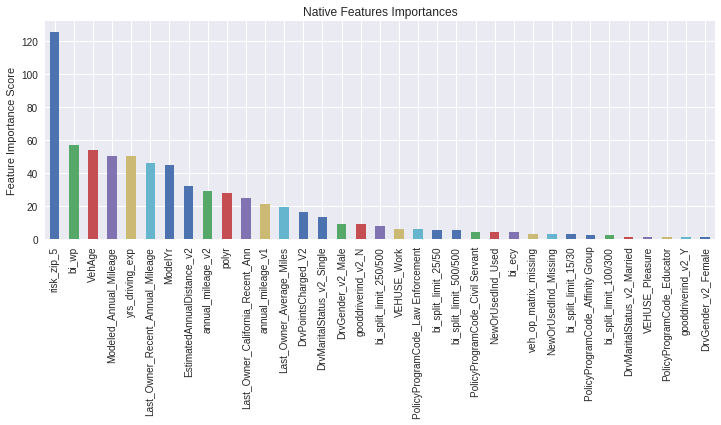

In [0]:
feat_imp = pd.Series(gbm.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Native Features Importances')
plt.ylabel('Feature Importance Score')

Notes: it was wrong when using the code: feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)

In [0]:
print(feat_imp)

risk_zip_5                           126
bi_wp                                 57
VehAge                                54
Modeled_Annual_Mileage                50
yrs_driving_exp                       50
Last_Owner_Recent_Annual_Mileage      46
ModelYr                               45
EstimatedAnnualDistance_v2            32
annual_mileage_v2                     29
polyr                                 28
Last_Owner_California_Recent_Ann      25
annual_mileage_v1                     21
Last_Owner_Average_Miles              19
DrvPointsCharged_V2                   16
DrvMaritalStatus_v2_Single            13
DrvGender_v2_Male                      9
gooddriverind_v2_N                     9
bi_split_limit_250/500                 8
VEHUSE_Work                            6
PolicyProgramCode_Law Enforcement      6
bi_split_limit_25/50                   5
bi_split_limit_500/500                 5
PolicyProgramCode_Civil Servant        4
NewOrUsedInd_Used                      4
bi_ecy          

# **Principle Component Analysis**

In [0]:
print ('Number of Native Features:%s'%len(native_features))



Number of Native Features:59


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
# For Visualization
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
import seaborn as sns
#3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

In [0]:
def pca_viz(num_components,cum_var_exp,var_exp):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 8))

        plt.bar(range(num_components), var_exp, alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(num_components), cum_var_exp, where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()

In [0]:
Features=df.loc[:,native_features]

In [0]:
scaler = StandardScaler().fit(Features)
Values_Scaled = scaler.transform(Features)

print(Values_Scaled[:,0].mean())  
print(Values_Scaled[:,0].std())

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


-1.3203323767380729e-14
0.9999999999999998


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
var_exp=[]
cum_var_exp=[]
pca = PCA(n_components=10)
pca.fit(Values_Scaled)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print ('Explained variance: %s'%round(pca.explained_variance_ratio_.sum()*100))

Explained variance: 48.0


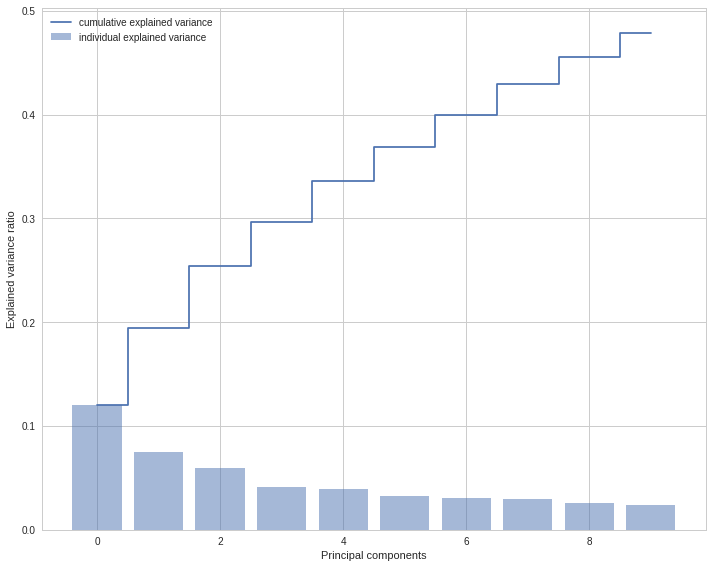

In [0]:
pca_viz(10,cum_var_exp,var_exp)

In [0]:
var_exp=[]
cum_var_exp=[]
pca = PCA(n_components=20)
pca.fit(Values_Scaled)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print ('Explained variance: %s'%round(pca.explained_variance_ratio_.sum()*100))

Explained variance: 67.0


In [0]:
var_exp=[]
cum_var_exp=[]
pca = PCA(n_components=40)
pca.fit(Values_Scaled)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print ('Explained variance: %s'%round(pca.explained_variance_ratio_.sum()*100))

Explained variance: 98.0


In [0]:
#heatmap visualization
def heatmap(data):
  fig, ax = plt.subplots(figsize=(10, 10))
  heatmap = sns.heatmap(data, cmap=plt.cm.Blues, center=0, linewidths=0.5, 
                  vmin=-1, vmax=1,annot=True, annot_kws={"size": 8})
  ax.xaxis.tick_top()  
# rotate
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.tight_layout()
 # Biplots
# Thanks to  DR-Rodriguez
# https://www.kaggle.com/strakul5/d/abcsds/pokemon/principal-component-analysis-of-pokemon-data
def pca_biplot(x_pc=0, y_pc=1, max_arrow=0.2, xlim=1, ylim=1):
    n = pc.shape[1]
    sns.set(style="ticks", palette="muted", color_codes=True)
    
    g = sns.lmplot(x='PC{}'.format(x_pc + 1), y='PC{}'.format(y_pc + 1),  data=pc_scores,
                   fit_reg=False, size=8,  scatter_kws={'alpha':0.3})
    for i in range(n):
        # Only plot the longer ones
        length = sqrt(pc.iloc[x_pc, i] ** 2 + pc.iloc[y_pc, i] ** 2)
        if length < max_arrow:
            continue
        plt.arrow(0, 0, pc.iloc[x_pc, i], pc.iloc[y_pc, i], color='k', alpha=1)
        plt.text(pc.iloc[x_pc, i] * 1.15, pc.iloc[y_pc, i] * 1.15,
                 pc.columns.tolist()[i], color='k', ha='center', va='center')
    g.set(ylim=(-ylim, ylim))
    g.set(xlim=(-xlim, xlim))

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
         self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
def pca_3Dplot(x_pc=0, y_pc=1, z_pc=2, max_arrow=0.2, xlim=1, ylim=1, zlim=1):        
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=50)
    sns.set(style="ticks", palette="muted", color_codes=True)

    ax.scatter(pc_scores.iloc[:, x_pc], pc_scores.iloc[:, y_pc], pc_scores.iloc[:, z_pc], 
           cmap='plt.cm.Paired')
    n = pc.shape[1]
    for i in range(n):
        length = sqrt(pc.iloc[0, i] ** 2 + pc.iloc[1, i] ** 2+pc.iloc[2, i] ** 2)
        if length < max_arrow:
            continue
        a = Arrow3D([0, pc.iloc[0, i]], [0, pc.iloc[1, i]], 
                [0, pc.iloc[2, i]], mutation_scale=20, 
                lw=2, arrowstyle="-|>", color="r")
        ax.add_artist(a)
        ax.text(x=pc.iloc[x_pc, i]*1.15, y=pc.iloc[y_pc, i]*1.15, z=pc.iloc[z_pc, i]*1.15,
                 s=pc.columns.tolist()[i],color='k', ha='center', va='center')
    ax.set_title("Three PCA directions")
    ax.set_xlabel('PC{}'.format(x_pc + 1))
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel('PC{}'.format(y_pc + 1))
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel('PC{}'.format(z_pc + 1))
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlim3d(-xlim, xlim)
    ax.set_ylim3d(-ylim, ylim)
    ax.set_zlim3d(-zlim, zlim)

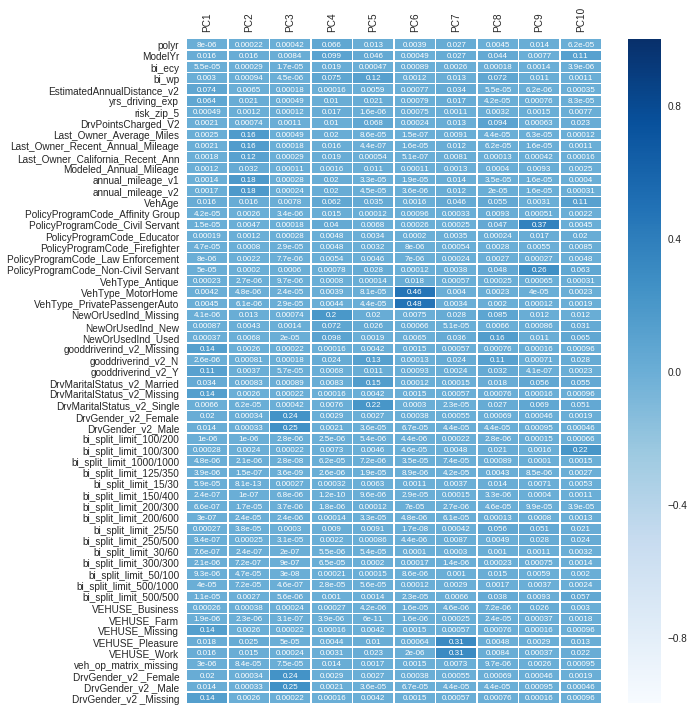

In [0]:
pca = PCA(n_components=10)
pc_scores = pd.DataFrame(pca.fit_transform(Values_Scaled))
pc_scores.columns = ['PC'+str(i+1) for i in range(len(pc_scores.columns))]
#principal components
pc = pd.DataFrame(pca.components_, columns=native_features)
pc.index = ['PC'+str(i+1) for i in range(len(pc_scores.columns))]
heatmap(pc.transpose()**2)

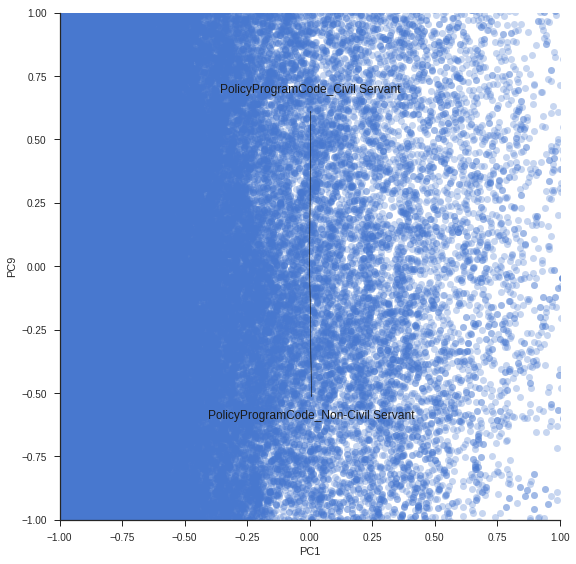

In [0]:
pca_biplot( 0, 8, max_arrow=0.4)

In [0]:
print(pc)

         polyr   ModelYr    bi_ecy     bi_wp  EstimatedAnnualDistance_v2  \
PC1  -0.002838 -0.125851 -0.007474 -0.055165                   -0.272478   
PC2   0.014654  0.126400  0.017121  0.030664                    0.080529   
PC3  -0.020363 -0.091471 -0.004969 -0.002163                    0.013387   
PC4   0.259418  0.321467  0.143779  0.270149                    0.014249   
PC5  -0.108432 -0.212338  0.031872  0.352472                    0.078701   
PC6  -0.058452  0.024398 -0.027733 -0.035144                   -0.020327   
PC7   0.180986 -0.169652  0.095669  0.107631                   -0.181579   
PC8  -0.064925  0.207137  0.002584  0.281507                   -0.022184   
PC9  -0.122888 -0.074413  0.006443  0.076249                    0.002827   
PC10  0.004744 -0.326577  0.000712  0.033647                    0.019280   

      yrs_driving_exp  risk_zip_5  DrvPointsCharged_V2  \
PC1         -0.253569    0.022262            -0.046296   
PC2         -0.143918   -0.034143             0

In [0]:
#Target Column
y=df.loc[:,target_column].values

In [0]:
# 2 PCA components
pca = PCA(n_components=2)
X_vis = pca.fit_transform(Values_Scaled)

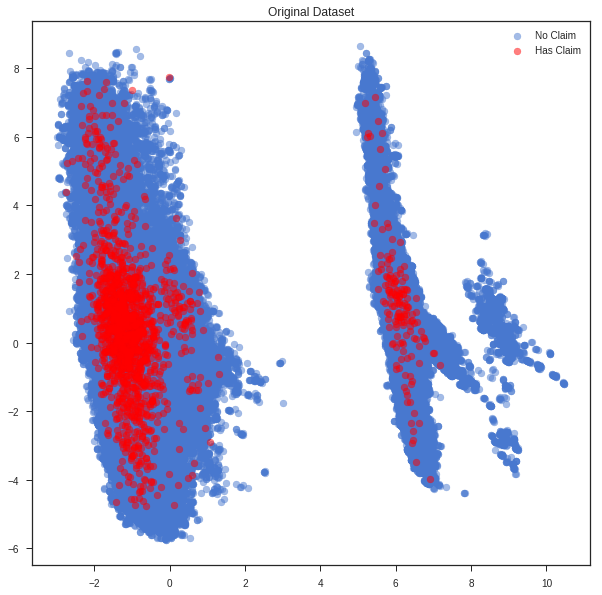

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="No Claim",
                 alpha=0.5)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Has Claim",
                 alpha=0.5, c='red')
plt.title("Original Dataset")
plt.legend()

# **Reduced Dataset**

In [0]:
from imblearn.under_sampling import RandomUnderSampler

In [0]:
rus = RandomUnderSampler(return_indices=True, random_state=42)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(Features, y)
Values_resampled_Scaled = scaler.transform(X_resampled)

In [0]:
# 2 PCA Componets
pca = PCA(n_components=2)
X_res_vis = pca.fit_transform(Values_resampled_Scaled)

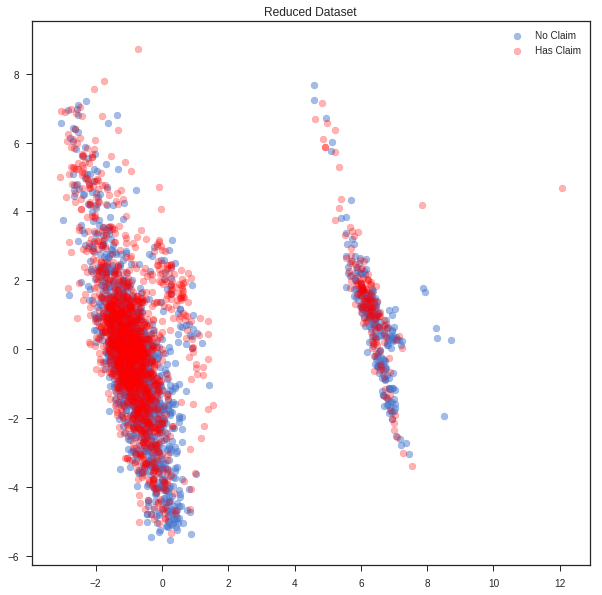

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], label="No Claim",
                 alpha=0.5)
plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], label="Has Claim",
                 alpha=0.3, c='red')
plt.title("Reduced Dataset")
plt.legend()

# **3D visualization**

In [0]:
# 3 PCA components
pca = PCA(n_components=3)
X_vis = pca.fit_transform(Values_Scaled)

Text(0.5,0.92,'Original Dataset')

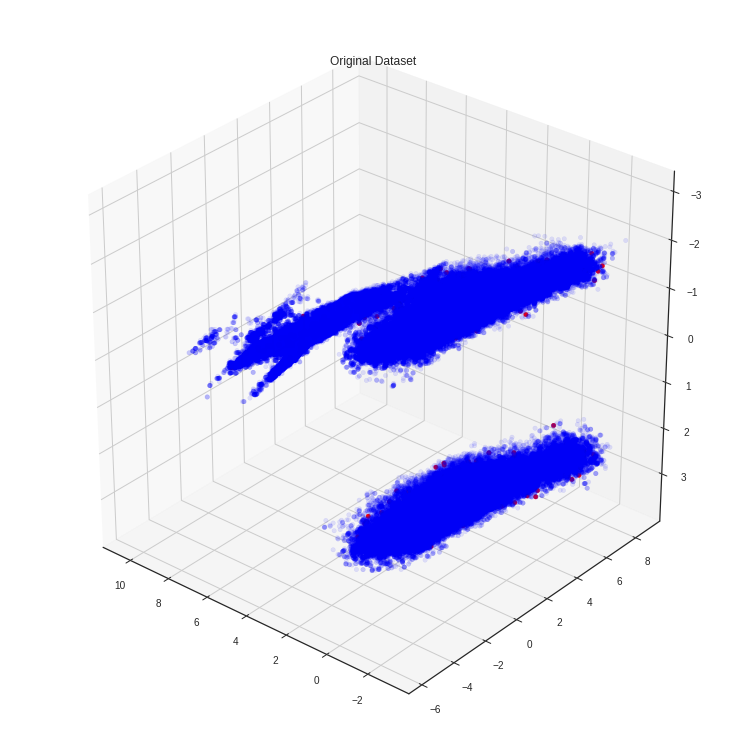

In [0]:


fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=50)
sns.set(style="ticks", palette="muted", color_codes=True)

ax.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], X_vis[y == 0, 2], 
           cmap='plt.cm.Paired', color='blue', alpha=0.1)
ax.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], X_vis[y == 1, 2], 
           cmap='plt.cm.Paired', color='red', alpha=1)
ax.set_title("Original Dataset")



In [0]:
#3 PCA Components for reduced dataset
pca = PCA(n_components=3)
X_res_vis = pca.fit_transform(Values_resampled_Scaled)


Text(0.5,0.92,'Reduced Dataset')

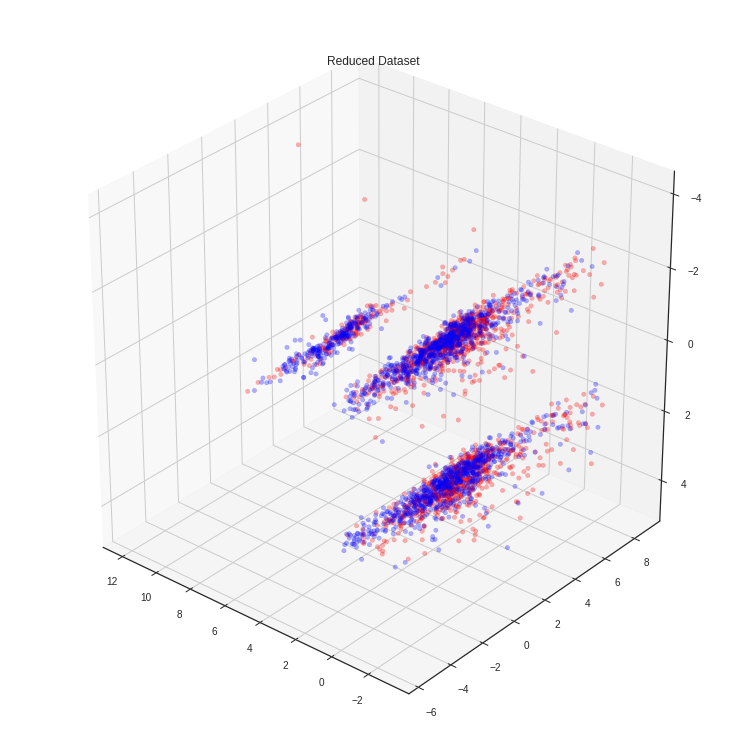

In [0]:
#Visualization
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=50)
sns.set(style="ticks", palette="muted", color_codes=True)

ax.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], X_res_vis[y_resampled == 0, 2], 
           cmap='plt.cm.Paired', color='blue', alpha=0.3)
ax.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], X_res_vis[y_resampled == 1, 2], 
           cmap='plt.cm.Paired', color='red', alpha=0.3)
ax.set_title("Reduced Dataset")

Feature Importance XGB models Analysis

**RandomUnderSamplerRatio**

In [0]:
#balances the number of No Claims in training set
#according to % in Models.csv

#import pandas as pd
#import numpy as np

In [0]:
#df=pd.read_csv('/content/gdrive/My Drive/NextGenModeling/Bi_modeling_binned_base.csv')

dataset=df
target_column = 'ClaimInd'

In [0]:
BaseModel=[  'polyr',
    'ModelYr',
    'bi_ecy',
    'bi_wp',
    'EstimatedAnnualDistance_v2',
    'yrs_driving_exp',
#    'bi_SFX_CNT',
    'risk_zip_5',
    'DrvPointsCharged_V2',
    'Last_Owner_Average_Miles',
    'Last_Owner_Recent_Annual_Mileage',
    'Last_Owner_California_Recent_Ann',
    'Modeled_Annual_Mileage',
    'annual_mileage_v1',
    'annual_mileage_v2',
    'VehAge',
    'PolicyProgramCode_Affinity Group',
    'PolicyProgramCode_Civil Servant',
    'PolicyProgramCode_Educator',
    'PolicyProgramCode_Firefighter',
    'PolicyProgramCode_Law Enforcement',
    'PolicyProgramCode_Non-Civil Servant',
    'VehType_Antique',
    'VehType_MotorHome',
    'VehType_PrivatePassengerAuto',
    'NewOrUsedInd_Missing',
    'NewOrUsedInd_New',
    'NewOrUsedInd_Used',
    'gooddriverind_v2_Missing',
    'gooddriverind_v2_N',
    'gooddriverind_v2_Y',
    'DrvMaritalStatus_v2_Married',
    'DrvMaritalStatus_v2_Missing',
    'DrvMaritalStatus_v2_Single',
    'DrvGender_v2_Female',
    'DrvGender_v2_Male',
    'bi_split_limit_100/200',
    'bi_split_limit_100/300',
    'bi_split_limit_1000/1000',
    'bi_split_limit_125/350',
    'bi_split_limit_15/30',
    'bi_split_limit_150/400',
    'bi_split_limit_200/300',
    'bi_split_limit_200/600',
    'bi_split_limit_25/50',
    'bi_split_limit_250/500',
    'bi_split_limit_30/60',
    'bi_split_limit_300/300',
    'bi_split_limit_50/100',
    'bi_split_limit_500/1000',
    'bi_split_limit_500/500',
    'VEHUSE_Business',
    'VEHUSE_Farm',
    'VEHUSE_Missing',
    'VEHUSE_Pleasure',
    'VEHUSE_Work',
    'veh_op_matrix_missing',
    'DrvGender_v2 _Female',
    'DrvGender_v2 _Male',
    'DrvGender_v2 _Missing'
]
ShortBestModel2 = [        'annual_mileage_v1',	
    'annual_mileage_v2',	
    'bi_ecy',	
    'bi_split_limit_100/300',	
    'bi_split_limit_15/30',	
    'bi_split_limit_25/50',	
    'bi_split_limit_250/500',	
    'bi_split_limit_500/500',	
    'bi_wp',	
    'DrvGender_v2 _Female',	
    'DrvGender_v2 _Male',	
    'DrvMaritalStatus_v2_Married',	
    'DrvMaritalStatus_v2_Single',	
    'DrvPointsCharged_V2',	
    'EstimatedAnnualDistance_v2',	
    'gooddriverind_v2_N',	
    'gooddriverind_v2_Y',	
    'Last_Owner_Average_Miles',	
    'Last_Owner_California_Recent_Ann',	
    'Last_Owner_Recent_Annual_Mileage',	
    'Modeled_Annual_Mileage',	
    'ModelYr',	
    'NewOrUsedInd_Missing',	
    'NewOrUsedInd_New',	
    'NewOrUsedInd_Used',	
    'PolicyProgramCode_Affinity Group',	
    'PolicyProgramCode_Civil Servant',	
    'PolicyProgramCode_Educator',	
    'PolicyProgramCode_Law Enforcement',	
    'risk_zip_5',	
    'veh_op_matrix_missing',	
    'VehAge',	
    'VEHUSE_Missing',	
    'VEHUSE_Pleasure',	
    'VEHUSE_Work',	
    'yrs_driving_exp',	
 'polyr',	

]

In [0]:
#models and analyzing results directory
ModelsDir='/content/gdrive/My Drive/NextGenModeling/'

In [0]:
print(ModelsDir)

/content/gdrive/My Drive/NextGenModeling/


In [0]:
#comparing model metrics with t-test
#and save results
import scipy.stats as stats
def AnalyzeAndSaveModelsResults(result_df,result_lst,ModelName,filename):
    df=pd.DataFrame([result_lst])
    TestSizeColumns=['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']
    #TestSizeColumns=['S0.2','S0.15','S0.1']
    df.columns=['Model']+TestSizeColumns
    #mean
    df['Mean'] = df.drop('Model', axis=1).mean(axis=1)
    df['t-pvalue'] = 1
    df['t-statistic'] = 0
    df['Group'] = 1
    #t-test with base model
    if ModelName!='BaseModel':
        base_model=result_df[result_df['Model'] == 'BaseModel'].iloc[0]
        current_model=df.iloc[0]
        t=stats.ttest_ind(base_model[TestSizeColumns].tolist(),current_model[TestSizeColumns].tolist())
        line_to_save=[current_model['Model']]
        line_to_save.extend(current_model[TestSizeColumns].tolist())
        line_to_save.append(current_model[TestSizeColumns].mean())
        line_to_save.append(t.pvalue)
        line_to_save.append(t.statistic)
        if ((t.pvalue<=0.05) and (base_model['Mean']<current_model['Mean'])):
            line_to_save.append(2)
        elif ((t.pvalue<=0.05) and (base_model['Mean']>current_model['Mean'])):
            line_to_save.append(3)    
        else:
            line_to_save.append(1)                  
        df_to_save=pd.DataFrame([line_to_save])
        df_to_save.columns=['Model']+TestSizeColumns+['Mean','t-pvalue','t-statistic','Group']
        result_df=result_df.append(df_to_save, ignore_index=True)
    else:
        result_df=result_df.append(df, ignore_index=True)
    result_df.to_csv(ModelsDir+filename, index = False)
    return result_df

In [0]:
#xgb library and parameters to tune later
import xgboost as xgb
#Adjusted Optimized
xgb_params = {
 'booster': 'gbtree',
 'cosample_bytree': 0.9786846475506199,
 'max_depth': 4,
 'subsample': 0.76097593937313557,
 'colsample_bylevel': 0.23209450560452577,
 'eta': 0.012080410469107298,
 'eval_metric': 'auc',
 'silent': True,
 'objective': 'binary:logistic',
 'seed': 42}

In [0]:
#Evaluation metric to be used in tuning
from sklearn.metrics import roc_auc_score
def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)
def gini_xgb(pred, y):
    y = y.get_label()
    return 'gini', gini(y, pred) / gini(y, y)
  

In [0]:
#Random Undersampler to balance the dataset
from imblearn.under_sampling import RandomUnderSampler
#ratio=0.918 to tune later

In [0]:


#StratifiedKFold
from sklearn.model_selection import StratifiedKFold
nrounds=5000 # need to change to 2000
kfold = 10  # need to change to 10
skf = StratifiedKFold(n_splits=kfold, random_state=42)



In [0]:
#splitting to train/test in the loop below
from sklearn.model_selection import train_test_split

In [0]:
#each line in the file contains the model name and set of features to analize
models = pd.read_csv(ModelsDir+'Models.csv', index_col=None)

#summary for test and train metrics for each model to test overfitting
models_test_gini_df=pd.DataFrame()
models_test_roc_auc_df=pd.DataFrame()
#
models_train_gini_df=pd.DataFrame()
models_train_roc_auc_df=pd.DataFrame()

In [0]:


for index, row in models.iterrows():
    #for test and train metrics for each model to test overfitting
    gini_test_lst=[]
    roc_auc_test_lst=[]
    gini_train_lst=[]
    roc_auc_train_lst=[]
    #Starting analyzing metric
    print (index, ': Analyzing model %s'%row['Model'])
    gini_test_lst.append(row['Model'])
    roc_auc_test_lst.append(row['Model'])
    gini_train_lst.append(row['Model'])
    roc_auc_train_lst.append(row['Model'])
    Ratio=row['Ratio']
    #calculating metrics for the current RandomUnderSample Ratio and 
    #several data sizes
    for s in (0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1):
        print ('Test size %s'%s)
        X, X_test, y, y_test = train_test_split(df.loc[:,BaseModel], dataset[target_column], test_size=s, random_state=42)
        #prediction dataframes
        y_pred_test=pd.DataFrame(index=y_test.index)
        y_pred_test[target_column]=0
        y_pred_train=pd.DataFrame(index=y.index)
        y_pred_train[target_column]=0
        #
        X = X.values
        y = y.values
        #Stratified Fold
        for i, (train_index, test_index) in enumerate(skf.split(X, y)):
            print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
            #getting fold data
            X_train, X_valid = X[train_index], X[test_index]
            y_train, y_valid = y[train_index], y[test_index]
            HasClaim=len(y_train[y_train==1])
            Total_train=len(y_train)
            NoClaim_train=len(y_train[y_train==0])
            #balancing dataset
            #converting Ratio to HasClaim=0 Size
            NoClaim=int(HasClaim*Ratio/(1-Ratio))
            print('--------------------------------------------------------------------')
            print('Ratio: %s'%Ratio)
            print('Total: %s'%Total_train)
            print('HasClaim Size: %s'%HasClaim)
            print('NoClaim Train Size: %s'%NoClaim_train)
            print('Calculated NoClaim Size: %s'%NoClaim)
            print('--------------------------------------------------------------------')
            NoClaimRatio={0 : NoClaim}
            rus = RandomUnderSampler(random_state=42,ratio=NoClaimRatio)
            X_res, y_res = rus.fit_sample(X_train, y_train)
            print('--------------------------------------------------------------------')
            Total_balnced=len(y_res)
            HasClaim_balanced=len(y_res[y_res==1])
            NoClaim_balanced=len(y_res[y_res==0])
            print('Total Balanced: %s'%Total_balnced)
            print('HasClaim Balanced Size: %s'%HasClaim_balanced)
            print('NoClaim Balanced Size: %s'%NoClaim_balanced)
            print('--------------------------------------------------------------------')
            #applying XGB
            d_train = xgb.DMatrix(X_res, y_res) 
            d_valid = xgb.DMatrix(X_valid, y_valid) 
            watchlist = [(d_train, 'train'), (d_valid, 'valid')]
            xgb_model = xgb.train(xgb_params, d_train, nrounds, watchlist, early_stopping_rounds=100, 
                          feval=gini_xgb, maximize=True, verbose_eval=1000)
            y_pred_test[target_column] +=  xgb_model.predict(xgb.DMatrix(X_test.values), ntree_limit=xgb_model.best_ntree_limit+50) / (kfold)
            y_pred_train[target_column] += xgb_model.predict(xgb.DMatrix(X), ntree_limit=xgb_model.best_ntree_limit+50) / (kfold)
        #Prediction results
        #test
        print('--------------------------------------------------------------------')
        print(row['Model'])
        print('Test Size %f'%s)
        print('Ratio: %s'%Ratio)
        print('--------------------------------------------------------------------')
        g=gini(y_test,y_pred_test)/gini(y_test,y_test)
        print('Test Gini - %f'%g)
        gini_test_lst.append(g)
        ROC_AUC=roc_auc_score(y_test, y_pred_test)
        print('Test ROC_AUC - %f'%ROC_AUC)
        roc_auc_test_lst.append(ROC_AUC)
        #train
        g=gini(y,y_pred_train)/gini(y,y)
        print('Train Gini - %f'%g)
        gini_train_lst.append(g)
        ROC_AUC=roc_auc_score(y, y_pred_train)
        print('Train ROC_AUC - %f'%ROC_AUC)
        roc_auc_train_lst.append(ROC_AUC)
    #save model analysis results
    models_test_gini_df=AnalyzeAndSaveModelsResults(models_test_gini_df,gini_test_lst,row['Model'],'models_test_gini.csv')
    models_test_roc_auc_df=AnalyzeAndSaveModelsResults(models_test_roc_auc_df,roc_auc_test_lst,row['Model'],'models_test_roc_auc.csv')
    models_train_gini_df=AnalyzeAndSaveModelsResults(models_train_gini_df,gini_train_lst,row['Model'],'models_train_gini.csv')
    models_train_roc_auc_df=AnalyzeAndSaveModelsResults(models_train_roc_auc_df,roc_auc_train_lst,row['Model'],'models_train_roc_auc.csv')

models_test_gini_df

In [0]:
models_test_gini_df.set_index('Model', inplace=True)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
colors = {1: 'blue', 2: 'green',3: 'red'}

In [0]:
customcmap = tuple(models_test_gini_df['Group'].map(colors))
models_test_gini_df['Mean'].plot(kind='barh',  color=[customcmap], figsize=(10, 12))

**Scale_pos_weight XGB parameter**


Data balancing

 The best value is 0.3. This approach provides a higher metric value.



In [0]:


#compare to a base model
#scale_pos_weight = round(NoClaim/HasClaim)
import pandas as pd
import numpy as np
from math import isnan



In [0]:
#data
#df=pd.read_csv('/content/gdrive/My Drive/NextGenModeling/Bi_modeling_binned_base.csv')
#target_column = 'hasclaim'

In [0]:
target_column = 'ClaimInd'
BaseModel=[  'polyr',
    'ModelYr',
    'bi_ecy',
    'bi_wp',
    'EstimatedAnnualDistance_v2',
    'yrs_driving_exp',
#    'bi_SFX_CNT',
    'risk_zip_5',
    'DrvPointsCharged_V2',
    'Last_Owner_Average_Miles',
    'Last_Owner_Recent_Annual_Mileage',
    'Last_Owner_California_Recent_Ann',
    'Modeled_Annual_Mileage',
    'annual_mileage_v1',
    'annual_mileage_v2',
    'VehAge',
    'PolicyProgramCode_Affinity Group',
    'PolicyProgramCode_Civil Servant',
    'PolicyProgramCode_Educator',
    'PolicyProgramCode_Firefighter',
    'PolicyProgramCode_Law Enforcement',
    'PolicyProgramCode_Non-Civil Servant',
    'VehType_Antique',
    'VehType_MotorHome',
    'VehType_PrivatePassengerAuto',
    'NewOrUsedInd_Missing',
    'NewOrUsedInd_New',
    'NewOrUsedInd_Used',
    'gooddriverind_v2_Missing',
    'gooddriverind_v2_N',
    'gooddriverind_v2_Y',
    'DrvMaritalStatus_v2_Married',
    'DrvMaritalStatus_v2_Missing',
    'DrvMaritalStatus_v2_Single',
    'DrvGender_v2_Female',
    'DrvGender_v2_Male',
    'bi_split_limit_100/200',
    'bi_split_limit_100/300',
    'bi_split_limit_1000/1000',
    'bi_split_limit_125/350',
    'bi_split_limit_15/30',
    'bi_split_limit_150/400',
    'bi_split_limit_200/300',
    'bi_split_limit_200/600',
    'bi_split_limit_25/50',
    'bi_split_limit_250/500',
    'bi_split_limit_30/60',
    'bi_split_limit_300/300',
    'bi_split_limit_50/100',
    'bi_split_limit_500/1000',
    'bi_split_limit_500/500',
    'VEHUSE_Business',
    'VEHUSE_Farm',
    'VEHUSE_Missing',
    'VEHUSE_Pleasure',
    'VEHUSE_Work',
    'veh_op_matrix_missing',
    'DrvGender_v2 _Female',
    'DrvGender_v2 _Male',
    'DrvGender_v2 _Missing'
]
ShortBestModel2 = [        'annual_mileage_v1',	
    'annual_mileage_v2',	
    'bi_ecy',	
    'bi_split_limit_100/300',	
    'bi_split_limit_15/30',	
    'bi_split_limit_25/50',	
    'bi_split_limit_250/500',	
    'bi_split_limit_500/500',	
    'bi_wp',	
    'DrvGender_v2 _Female',	
    'DrvGender_v2 _Male',	
    'DrvMaritalStatus_v2_Married',	
    'DrvMaritalStatus_v2_Single',	
    'DrvPointsCharged_V2',	
    'EstimatedAnnualDistance_v2',	
    'gooddriverind_v2_N',	
    'gooddriverind_v2_Y',	
    'Last_Owner_Average_Miles',	
    'Last_Owner_California_Recent_Ann',	
    'Last_Owner_Recent_Annual_Mileage',	
    'Modeled_Annual_Mileage',	
    'ModelYr',	
    'NewOrUsedInd_Missing',	
    'NewOrUsedInd_New',	
    'NewOrUsedInd_Used',	
    'PolicyProgramCode_Affinity Group',	
    'PolicyProgramCode_Civil Servant',	
    'PolicyProgramCode_Educator',	
    'PolicyProgramCode_Law Enforcement',	
    'risk_zip_5',	
    'veh_op_matrix_missing',	
    'VehAge',	
    'VEHUSE_Missing',	
    'VEHUSE_Pleasure',	
    'VEHUSE_Work',	
    'yrs_driving_exp',	
 'polyr',	

]
featureset=BestModel

In [0]:
:

#models and analyzing results directory
ModelsDir='/content/gdrive/My Drive/NextGenModeling/'



In [0]:
#comparing model metrics with t-test
#and save results
import scipy.stats as stats
def AnalyzeAndSaveModelsResults(result_df,result_lst,ModelName,filename):
    df=pd.DataFrame([result_lst])
    TestSizeColumns=['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']
    #TestSizeColumns=['S0.2','S0.15','S0.1']
    df.columns=['Model']+TestSizeColumns
    #mean
    df['Mean'] = df.drop('Model', axis=1).mean(axis=1)
    df['t-pvalue'] = 1
    df['t-statistic'] = 0
    df['Group'] = 1
    #t-test with base model
    if ModelName!='BaseModel':
        base_model=result_df[result_df['Model'] == 'BaseModel'].iloc[0]
        current_model=df.iloc[0]
        t=stats.ttest_ind(base_model[TestSizeColumns].tolist(),current_model[TestSizeColumns].tolist())
        line_to_save=[current_model['Model']]
        line_to_save.extend(current_model[TestSizeColumns].tolist())
        line_to_save.append(current_model[TestSizeColumns].mean())
        line_to_save.append(t.pvalue)
        line_to_save.append(t.statistic)
        if ((t.pvalue<=0.05) and (base_model['Mean']<current_model['Mean'])):
            line_to_save.append(2)
        elif ((t.pvalue<=0.05) and (base_model['Mean']>current_model['Mean'])):
            line_to_save.append(3)    
        else:
            line_to_save.append(1)                  
        df_to_save=pd.DataFrame([line_to_save])
        df_to_save.columns=['Model']+TestSizeColumns+['Mean','t-pvalue','t-statistic','Group']
        result_df=result_df.append(df_to_save, ignore_index=True)
    else:
        result_df=result_df.append(df, ignore_index=True)
    result_df.to_csv(ModelsDir+filename, index = False)
    return result_df

In [0]:
#xgb library and some base parameters
import xgboost as xgb
base_params = {'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True,'booster': 'gbtree','seed':42}

In [0]:
#Evaluation metric to be used in tuning
from sklearn.metrics import roc_auc_score
def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)
def gini_xgb(pred, y):
    y = y.get_label()
    return 'gini', gini(y, pred) / gini(y, y)

In [0]:
#StratifiedKFold
from sklearn.model_selection import StratifiedKFold
nrounds=5000 # need to change to 2000
kfold = 10  # need to change to 10
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [0]:
#splitting to train/test in the loop below
from sklearn.model_selection import train_test_split

In [0]:
#each line in the file contains the model name and set of parameters to analize
models = pd.read_csv(ModelsDir+'Models.csv', index_col=None)

In [0]:


#summary for test and train metrics for each model to test overfitting
models_test_gini_df=pd.DataFrame()
models_test_roc_auc_df=pd.DataFrame()
#
models_train_gini_df=pd.DataFrame()
models_train_roc_auc_df=pd.DataFrame()
#
base_model_df=pd.DataFrame()



In [0]:
for index, row in models.iterrows():
    #for test and train metrics for each model to test overfitting
    gini_test_lst=[]
    roc_auc_test_lst=[]
    gini_train_lst=[]
    roc_auc_train_lst=[]
    #Starting analyzing metric
    print (index, ': Analyzing model %s'%row['Model'])
    #reading model parameters from a row to a dictionary
    parameterset=row[1:10].to_dict()
    parameterset={k: parameterset[k] for k in parameterset if not isnan(parameterset[k])}
    #join with base parameters
    xgb_params = {**base_params, **parameterset}
    #int is needed for several parameters
    try:
        xgb_params['min_child_weight'] = int(xgb_params['min_child_weight'])
    except KeyError:
    # Key is not present
        pass
    try:
        xgb_params['max_depth'] = int(xgb_params['max_depth'])
    except KeyError:
    # Key is not present
        pass    
    try:
        xgb_params['max_delta_step'] = int(xgb_params['max_delta_step'])
    except KeyError:
    # Key is not present
        pass           
    gini_test_lst.append(row['Model'])
    roc_auc_test_lst.append(row['Model'])
    gini_train_lst.append(row['Model'])
    roc_auc_train_lst.append(row['Model'])
    #calculating metrics for the current parameter set and 
    #several data sizes
    for s in (0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1):
    #for s in (0.2,0.15,0.1):
        print ('Test size %s'%s)
        X, X_test, y, y_test = train_test_split(dataset.loc[:,featureset], dataset[target_column], test_size=s, random_state=42)
                
        #prediction dataframes
        y_pred_test=pd.DataFrame(index=y_test.index)
        y_pred_test[target_column]=0
        y_pred_train=pd.DataFrame(index=y.index)
        y_pred_train[target_column]=0
        #
        X = X.values
        y = y.values
        #Stratified Fold
        for i, (train_index, test_index) in enumerate(skf.split(X, y)):
            print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
            #getting fold data
            X_train, X_valid = X[train_index], X[test_index]
            y_train, y_valid = y[train_index], y[test_index]
            #calculating ratio sum(negative cases) / sum(positive cases) to get scale_pos_weight
            HasClaim=len(y_train[y_train==1])
            NoClaim=len(y_train[y_train==0])
            scale_pos_weight=round(NoClaim/HasClaim)
            tmp={'scale_pos_weight':scale_pos_weight}
            xgb_params = {**xgb_params, **tmp}
            print(xgb_params)
            #applying XGB
            d_train = xgb.DMatrix(X_train, y_train) 
            d_valid = xgb.DMatrix(X_valid, y_valid) 
            watchlist = [(d_train, 'train'), (d_valid, 'valid')]
            xgb_model = xgb.train(xgb_params, d_train, nrounds, watchlist, early_stopping_rounds=100, 
                          feval=gini_xgb, maximize=True, verbose_eval=1000)
            y_pred_test[target_column] +=  xgb_model.predict(xgb.DMatrix(X_test.values), ntree_limit=xgb_model.best_ntree_limit+50) / (kfold)
            y_pred_train[target_column] += xgb_model.predict(xgb.DMatrix(X), ntree_limit=xgb_model.best_ntree_limit+50) / (kfold)
        #Prediction results
        #test
        g=gini(y_test,y_pred_test)/gini(y_test,y_test)
        print('Test Gini - %f'%g)
        gini_test_lst.append(g)
        ROC_AUC=roc_auc_score(y_test, y_pred_test)
        print('Test ROC_AUC - %f'%ROC_AUC)
        roc_auc_test_lst.append(ROC_AUC)
        #train
        g=gini(y,y_pred_train)/gini(y,y)
        print('Train Gini - %f'%g)
        gini_train_lst.append(g)
        ROC_AUC=roc_auc_score(y, y_pred_train)
        print('Train ROC_AUC - %f'%ROC_AUC)
        roc_auc_train_lst.append(ROC_AUC)
    #save model analysis results
    models_test_gini_df=AnalyzeAndSaveModelsResults(models_test_gini_df,gini_test_lst,row['Model'],'models_test_gini.csv')
    models_test_roc_auc_df=AnalyzeAndSaveModelsResults(models_test_roc_auc_df,roc_auc_test_lst,row['Model'],'models_test_roc_auc.csv')
    models_train_gini_df=AnalyzeAndSaveModelsResults(models_train_gini_df,gini_train_lst,row['Model'],'models_train_gini.csv')
    models_train_roc_auc_df=AnalyzeAndSaveModelsResults(models_train_roc_auc_df,roc_auc_train_lst,row['Model'],'models_train_roc_auc.csv')

In [0]:
models_test_gini_df

In [0]:
models_test_gini_df.set_index('Model', inplace=True)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
colors = {1: 'blue', 2: 'green',3: 'red'}

In [0]:
customcmap = tuple(models_test_gini_df['Group'].map(colors))
models_test_gini_df['Mean'].plot(kind='barh',  color=[customcmap], figsize=(10, 12))

**Models Evaluation**

Imbalance data set is one of the most challenging problem. That's why the right model evaluation method is a main research issue. Traditional metrics (accuracy, sensitivity, specificity, precision) lead to a biased classification when the classes are not equally distributed.

In my model evaluation process I used the area under the ROC curve (Area under curve, AUC) and Gini coefficient.

AUC is equivalent to the probability that the classifier will rank randomly chosen positive sample higher than a randomly chosen negative sample. AUC value varies between 0.5 (random guessing) and 1. For at fault claim prediction task it's usually 0.6-0.8 (fair to good performance).

The other metric used in imbalance data classification is a chance-standardize variant of the AUC is Gini coefficient. It's related to AUC in this way:

G = 2AUC-1

Gini coefficient values are between 0 and 1 (complete separation between the 2 distribution).

Let's say G's are metric values obtained from the model on different train/test sizes. They are random variables, normally distributed.

To compare one model performance to an other I used two-tailed paired t test. The test asks the question: is the Gini coefficient of the two system different

.         Null hypothesis: the 2 models have the same Gini coefficient

.         Alternate hypothesis: one of the model has a different Gini coefficient

Paired t-test is used to calculate probability p that mean of G's would arise from null hypothesis

If p is sufficiently small (typically < 0.05) then reject the null hypothesis.

To research models based on different feature sets I did not create the sets dynamically. Instead, I described a model in an Excel spreadsheet where each line is a model and a column is a feature name (original or engineered). The spreadsheet is converted in an csv file and used in the code. The code reads the model definition from the file and run them one by one on 8 train/test sizes to calculate the metrics. Each model is compared to the first one described in the file (BaseModel) to get probability from t test. Based on the p value each model is categorized in one of the 3 groups: 1 - no changes, statistically the same as the BaseModel, 2 - significantly better then the BaseModel and 3 - significantly worse then the BaseModel.

The results (models metrics values, p and t values from t-test, group) are saved in an other csv file after each model run and can be reviewed while the main code is still running.

At the end, the file with results are saved together with model descriptions to simplify analyzing and historical references.

In [this Excel workbook](https://github.com/KaterynaD/Auto-Insurance-Risk-Classification-and-Claim-Prediction/blob/master/Models%20Workbook.xlsx) you can review the model descriptions tabs (they are saved as csv files and used in the code) and the output results. See All Individual Features tab as an example of a models tab and All Individual Features Results tab with the output.

Several Python notebooks and programs were created to read the model descriptions from csv files, apply some feature engineering if needed and output the comparison between the models. The notebooks were used to test the approach and then converted to a code and run in a background mode. You can find the links specific for each step below. *[Monitor notebook](https://github.com/KaterynaD/Auto-Insurance-Risk-Classification-and-Claim-Prediction/blob/master/Finding%20Best%20Model/XGB/Monitor.ipynb)* was used to review already analyzed models results from a program running in the background. The other Monitor (Models Results Visualization [link text](https://github.com/KaterynaD/Auto-Insurance-Risk-Classification-and-Claim-Prediction/blob/master/Finding%20Best%20Model/XGB/Models%20Results%20Visualization.ipynb)) notebook builds charts to compare overfitting between the models.

**Feature Importance**

Based on the information I gathered on Data Profile step I selected few features which are important according to all methods I applied for the initial research (base set marked as group 1 in the table above).

Next, I added other features one by one alone to the base set and compare results to the base set result.

Most of them are just noisy features and did not improve the result at all. If there is a positive change in the metric it is not statistically significant.

Some of the features (like Relationship To Insured) even decreased the result statistically significantly.

To find this bad feature I used Lesion studies. To understand what contributes to a model I removed (lesioning) features from a model.

Here is the [notebook](https://github.com/KaterynaD/Auto-Insurance-Risk-Classification-and-Claim-Prediction/blob/master/Finding%20Best%20Model/XGB/Comparing%20To%20BaseModel.ipynb) used to compare a Base Model (base set of features) to other models with addition more or one features. See also the code with the same functionality.

The final 21 features were investigated in a more traditional way. I reviewed partial dependency of each feature according to XGB Feature Importance order starting from the less important.

Several features were rejected because if there is a dependency from a feature it is not dependency on the feature value but rather how this information is collected in the original system.

Let's say there are 3 feature values: "Yes", "No" and "Unknown" (no value in the system). "Yes" and "No" have approximately the same probability of having claim and only "Unknown" is different. It looks like this information is collected specifically for drivers with claims. If it's a new driver in the system we can not predict using this feature. 

External Features

There are several features describing vehicle parameters added from public data sources by VIN number. Since they are not easy available I review their performance in a separate step.

Only 2 of them are really important: extranal_length and external_width

The rest does not change the model performance statistically significant.
Feature Engineering

Simple Calculation is the way to improve mostly numerical features output. Though I tried encoded values of categorical features.

Frequency and Targeting Encoding is the way to deal with categorical features. No one high cardinality categorical feature was recognized as useful at Feature Importance step. I added these methods to the research with a thought to improve the high cardinality features performance.

The model descriptions and results are in Feature Engineering Workbook.xlsx.

Simple Calculation

At this step I investigated if there is any positive impact if I will use sum or difference or multiplication two or more features.

In the Models spreadsheet I added one more column (Formula) to keep the expression to investigate. The code builds the dynamic feature on a fly based on the column and compare a model with the engineered feature to a Base Model.

I did not find any visible improvement except 2 cases:

1.       If features are strong by themselves, the combination is also strong but not statistically significant. It does not make sense to spend resources on transformation if we can include in the final model raw features and have the same improvement

2.       [Driver Age] - [Age when Driver obtained the License] e.g. Driver License Age works much better then just [Age when Driver obtained the License]

Here is the notebook and code to apply this type of engineering.

![alt text](https://)